# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
RFvectorizer = CountVectorizer()
X = RFvectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with added parameters
RFmodel = RandomForestClassifier(
    n_estimators=3000,         # Number of trees
    max_depth=None,            # Maximum depth of each tree
    min_samples_split=20,      # Minimum number of samples to split a node

    min_samples_leaf=1,        # Minimum number of samples in a leaf node
    max_features='sqrt',       # Number of features to consider at each split
    bootstrap=False,            # Whether to use bootstrapping

    random_state=42            # For reproducibility
)

# Train the model
RFmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RFmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 86.00%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.81      0.70      0.75       379
     bipolar       0.93      0.47      0.62       384
  depression       0.72      0.77      0.74       373
      normal       0.88      1.00      0.93      2183
        ptsd       0.92      0.74      0.82       394

    accuracy                           0.86      3713
   macro avg       0.85      0.73      0.77      3713
weighted avg       0.86      0.86      0.85      3713

Confusion Matrix:
 [[ 264    3   34   68   10]
 [  12  180   46  141    5]
 [  26    3  286   48   10]
 [   3    6    1 2173    0]
 [  19    2   30   53  290]]


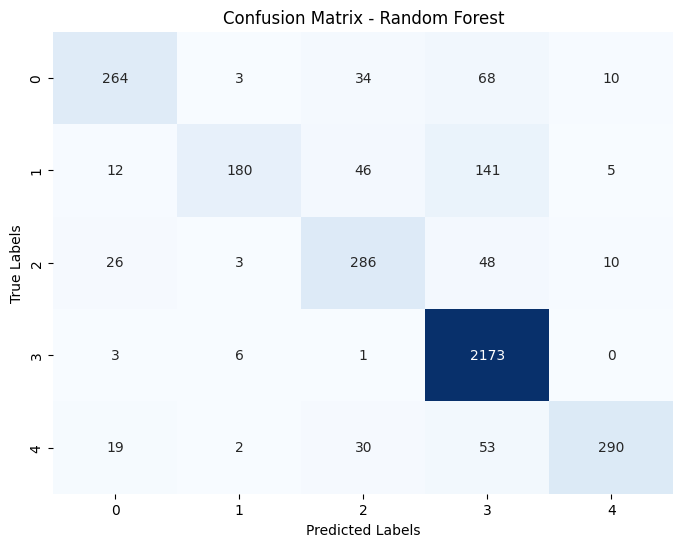

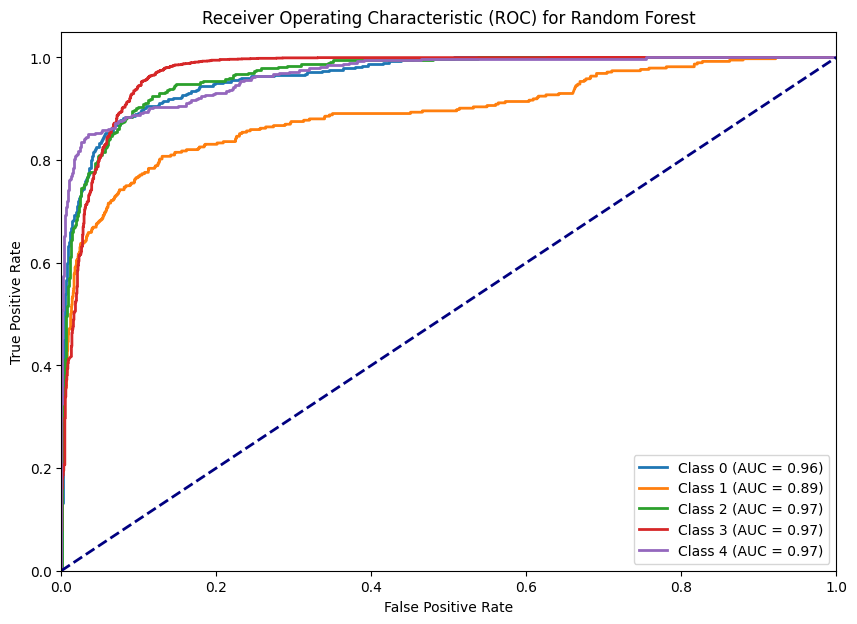

In [ ]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=RFmodel.classes_)
n_classes = y_test_binarized.shape[1]

# Get predicted probabilities for each class
y_score = RFmodel.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Random Forest')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Saving the RFmodel and RFvectorizer

import joblib

# Save the best model and vectorizer
joblib.dump(RFmodel, 'RFmodel.pkl')
joblib.dump(RFvectorizer, 'RFvectorizer.pkl')

['RFvectorizer.pkl']

In [5]:
from google.colab import files

# Specify the path of your .pkl file
file_path = '/content/RFmodel.pkl'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!jupyter nbconvert --to html 06_Random_Forest.ipynb

[NbConvertApp] Converting notebook 06_Random_Forest.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 407889 bytes to 06_Random_Forest.html
